In [1]:
import librosa
import librosa.display as lida
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import scipy.io as spio
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data_path='/content/drive/MyDrive/Coursework_C/'

In [3]:
mat = spio.loadmat(data_path + 'training.mat', squeeze_me=True)
d = mat['d']
Index = mat['Index']
Class = mat['Class']
Index_sorted=sorted(Index)

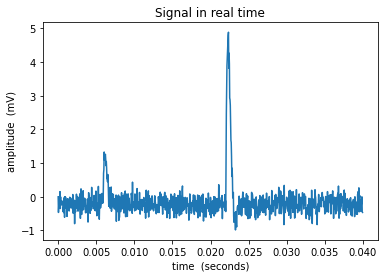

In [ ]:
plt.title('Signal in real time')
plt.xlabel('time  (seconds)')
plt.ylabel('amplitude  (mV)')
plt.plot(np.array(range(len(d[:1000])))/25000, d[:1000])
plt.show()

In [4]:
def slice_into_frames(amplitudes, window_length, hop_length):
    return librosa.core.spectrum.util.frame(
        np.pad(amplitudes, int(window_length // 2), mode='reflect'),
        frame_length=window_length, hop_length=hop_length)
    # returns [window_length, num_windows]

The fast Fourier transform (FFT) is an algorithm that can efficiently compute the Fourier transform. 

In [5]:
def get_STFT(amplitudes, window_length, hop_length):
    # slicing into intersecting frames [window_length, num_frames]
    frames = slice_into_frames(amplitudes, window_length, hop_length)
    
    # getting weights for Fourier, float[window_length]
    fft_weights = librosa.core.spectrum.get_window('hann', window_length, fftbins=True)
    
    # transforming with Fourier
    stft = np.fft.rfft(frames * fft_weights[:, None], axis=0)
    return stft

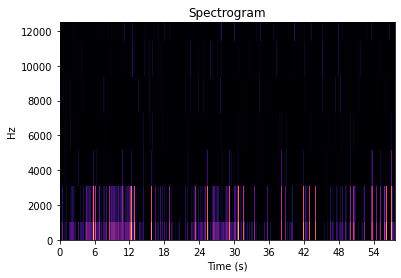

In [6]:
window=13
hop=1
stft = get_STFT(d,window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');
plt.title('Spectrogram')
plt.show()

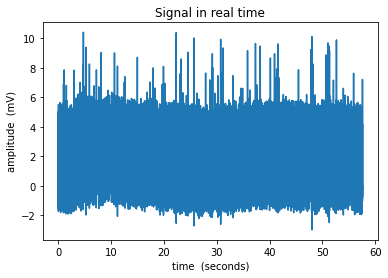

In [ ]:
plt.title('Signal in real time')
plt.xlabel('time  (seconds)')
plt.ylabel('amplitude  (mV)')
plt.plot(np.array(range(len(d)))/25000, d)
plt.show()

Number of activations in class 1 =  682


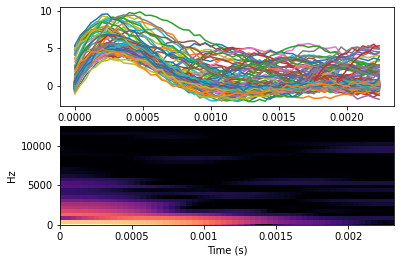

In [ ]:
fig, axs = plt.subplots(2)
number_of_activations_in_class=0
count_labels=-1
for i in Index:
 count_labels+=1
 if Class[count_labels]==1:
   number_of_activations_in_class+=1
   axs[0].plot(np.array(range(len(d[i:i+57])))/25000, d[i:i+57])
   plt.show
print('Number of activations in class 1 = ',number_of_activations_in_class)
window=56
hop=1
stft = get_STFT(d[899266:899266+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');


Number of activations in class 2 =  678


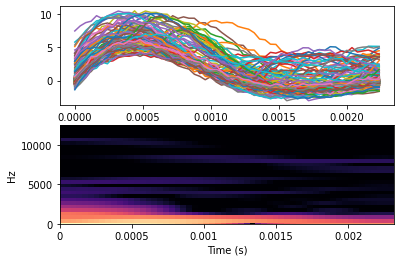

In [ ]:
fig, axs = plt.subplots(2)
number_of_activations_in_class=0
count_labels=-1
for i in Index:
 count_labels+=1
 if Class[count_labels]==2:
   number_of_activations_in_class+=1
   axs[0].plot(np.array(range(len(d[i:i+57])))/25000, d[i:i+57])
   plt.show
print('Number of activations in class 2 = ',number_of_activations_in_class)
window=56
hop=1
stft = get_STFT(d[711074:711074+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');

Number of activations in class 3 =  650


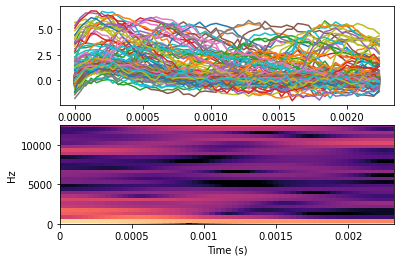

In [ ]:
fig, axs = plt.subplots(2)
number_of_activations_in_class=0
count_labels=-1
for i in Index:
 count_labels+=1
 if Class[count_labels]==3:
   number_of_activations_in_class+=1
   axs[0].plot(np.array(range(len(d[i:i+57])))/25000, d[i:i+57])
   plt.show
print('Number of activations in class 3 = ',number_of_activations_in_class)
window=56
hop=1
stft = get_STFT(d[753868:753868+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');

Number of activations in class 4 =  671


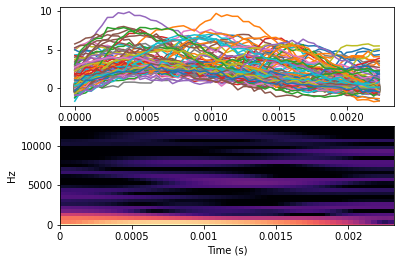

In [ ]:
fig, axs = plt.subplots(2)
number_of_activations_in_class=0
count_labels=-1
for i in Index:
 count_labels+=1
 if Class[count_labels]==4:
   number_of_activations_in_class+=1
   axs[0].plot(np.array(range(len(d[i:i+57])))/25000, d[i:i+57])
   plt.show
print('Number of activations in class 4 = ',number_of_activations_in_class)
window=56
hop=1
stft = get_STFT(d[1302019:1302019+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');

Number of activations in class 5 =  662


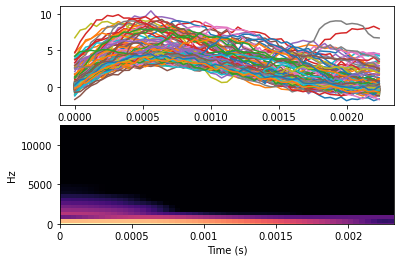

In [ ]:
fig, axs = plt.subplots(2)
number_of_activations_in_class=0
count_labels=-1
for i in Index:
 count_labels+=1
 if Class[count_labels]==5:
   number_of_activations_in_class+=1
   axs[0].plot(np.array(range(len(d[i:i+57])))/25000, d[i:i+57])
   plt.show
print('Number of activations in class 5 = ',number_of_activations_in_class)
window=56
hop=1
stft = get_STFT(d[1316598:1316598+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');

In [ ]:
number_of_activations=len(Index)
keys=[]
for j in range(number_of_activations):
  keys.append((Index[j],Class[j]))
print(keys)

[(914798, 4), (961350, 2), (933102, 5), (1431522, 2), (409537, 5), (1232344, 2), (441877, 3), (485620, 4), (429564, 1), (859268, 3), (11484, 2), (850234, 3), (417340, 5), (966257, 1), (176856, 3), (1209064, 1), (892113, 3), (992442, 1), (303384, 3), (657264, 2), (1426759, 3), (1331119, 2), (643688, 4), (1323572, 4), (915916, 3), (61910, 1), (266401, 5), (725240, 1), (82815, 3), (714038, 3), (29692, 4), (673018, 5), (360850, 1), (254178, 1), (869299, 4), (780396, 1), (128784, 2), (1200525, 2), (13499, 5), (84021, 2), (1363055, 3), (1431811, 1), (1239565, 1), (1239518, 5), (421147, 2), (893268, 4), (523826, 4), (48893, 5), (531686, 4), (911842, 1), (791887, 2), (758997, 5), (292605, 3), (1163974, 1), (363771, 5), (415913, 3), (115283, 2), (835859, 4), (1183119, 1), (1133748, 1), (666406, 1), (231378, 3), (1124617, 5), (363903, 1), (207390, 5), (959572, 5), (445581, 1), (906226, 4), (1325515, 4), (808142, 3), (715977, 3), (541940, 4), (1156100, 2), (1260559, 1), (1122784, 4), (1375039, 1)

In [ ]:
#creating additional "no activation" class (where gaps are big), or the noise class number 0
no_activation_Class_indexes=[0]
for j in range(1,number_of_activations):
  if (Index_sorted[j]-Index_sorted[j-1])>700:
    no_activation_Class_indexes.append(Index_sorted[j-1]+100)
print(no_activation_Class_indexes)
print(len(no_activation_Class_indexes))


[0, 2605, 4855, 6139, 7288, 10213, 11961, 15371, 16660, 18814, 19743, 21657, 25568, 26302, 27556, 28605, 29792, 30992, 32439, 33359, 36963, 39944, 42278, 43559, 44750, 51090, 53089, 53877, 56160, 59072, 61188, 64034, 64830, 66743, 68393, 71095, 73237, 74131, 76429, 78130, 79084, 81416, 84742, 86291, 89376, 90390, 92571, 94381, 96075, 98477, 100622, 103713, 104507, 105983, 107266, 108702, 111056, 113339, 115537, 116533, 117631, 119421, 121402, 123607, 125062, 129464, 132384, 135809, 136790, 137757, 139298, 140520, 141446, 143911, 146435, 152338, 154615, 157402, 160111, 161790, 163003, 169671, 173957, 174768, 177837, 181027, 182692, 183579, 186255, 187211, 189049, 190158, 193234, 193978, 195623, 198086, 200550, 202082, 203780, 204696, 210019, 211147, 212572, 214555, 218118, 219330, 221683, 223503, 226085, 229138, 231946, 233411, 235405, 236600, 237547, 240024, 242641, 244291, 245312, 246487, 249550, 250964, 252453, 254782, 261850, 265405, 270159, 272823, 273546, 275611, 277935, 279058, 2

<function matplotlib.pyplot.show>

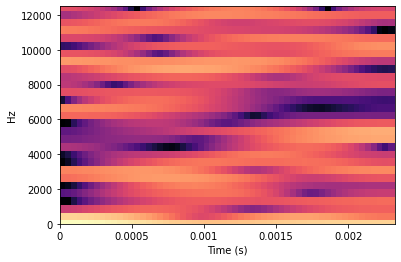

In [ ]:
window=56
hop=1
stft = get_STFT(d[16660:16660+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');
plt.show

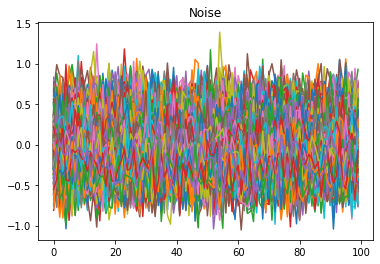

In [ ]:
for i in no_activation_Class_indexes:
   plt.pyplot.plot(np.array(d[i:i+100]))
   plt.pyplot.title('Noise')


In [ ]:
for j in no_activation_Class_indexes:
  keys.append((j,0))
import random
random.shuffle(keys)
print(keys)

[(1423476, 2), (899266, 1), (376718, 4), (115283, 2), (88448, 1), (598900, 2), (1114247, 4), (42278, 0), (381582, 0), (425429, 4), (119318, 5), (1382037, 4), (1180043, 1), (1153089, 2), (961350, 2), (647657, 3), (206571, 3), (45895, 5), (161690, 3), (888756, 2), (1429201, 5), (345232, 5), (1084272, 1), (231378, 3), (1136935, 4), (1004827, 3), (439198, 4), (503582, 1), (1139239, 4), (379422, 5), (496021, 2), (321410, 1), (640091, 1), (1424171, 0), (1018478, 1), (860476, 2), (225629, 1), (1366857, 3), (49900, 4), (169514, 1), (588334, 4), (267258, 3), (1278929, 3), (419153, 4), (1135364, 2), (543569, 3), (883822, 4), (622996, 5), (1102333, 4), (773060, 2), (1366296, 4), (1116963, 4), (627913, 3), (658214, 3), (758012, 0), (189778, 5), (158807, 1), (465451, 0), (1085211, 2), (1340162, 4), (859998, 2), (165397, 3), (722380, 5), (55099, 1), (504829, 1), (576714, 2), (714038, 3), (1026027, 1), (510821, 3), (1053224, 0), (211047, 5), (1141649, 1), (992442, 1), (335537, 5), (443610, 2), (10511

(19, 57)

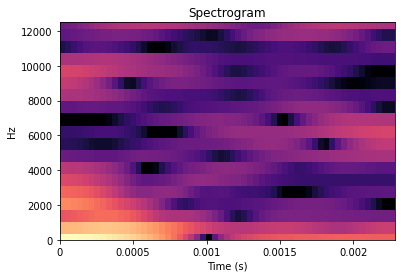

In [ ]:
window=37
hop=1
stft = get_STFT(d[1194621:1194621+57],window,hop)
spectrogram = np.abs(stft ** 2)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
lida.specshow(spectrogram, sr=25000,hop_length=hop, x_axis='s', y_axis='hz');
plt.title('Spectrogram')
plt.show
type(spectrogram)
spectrogram.shape

In [ ]:
#getting spectrogram
def get_spectrogram(data,index,window,hop):
  stft = get_STFT(data[index:index+57],window,hop)
  spectrogram = np.abs(stft ** 2)
  return(librosa.amplitude_to_db(spectrogram, ref=np.max))

#normalizing "pixels"
def spec_to_image(spec, eps=1e-6):
        mean = spec.mean()
        std = spec.std()
        spec_norm = (spec - mean) / (std + eps)
        spec_min, spec_max = spec_norm.min(), spec_norm.max()
        spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
        spec_scaled = spec_scaled.astype(np.uint8)
        return np.array(spec_scaled)

Text(0.5, 1.0, 'Amplitudes of a spike')

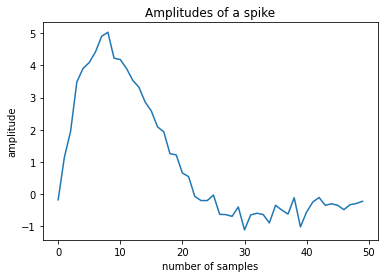

In [9]:
plt.plot(np.array(d[567211:567211+50]))
plt.xlabel('number of samples')
plt.ylabel('amplitude')
plt.title('Amplitudes of a spike')

(24, 57)

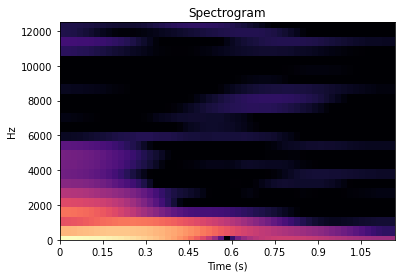

In [ ]:
s=get_spectrogram(d,567211,47,1)
lida.specshow(s, sr=25000, x_axis='s', y_axis='hz');
plt.title('Spectrogram of a spike')
plt.show
s.shape

(24, 57)

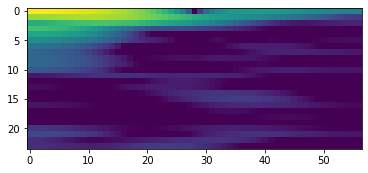

In [ ]:
plt.imshow(spec_to_image(s), interpolation='none')
spec_to_image(s).shape

# Prepairing training and validation data

In [ ]:
window=47
hop=1
train_labels=[]
val_labels=[]
train_data=[]
val_data=[]
count=-1
train_set_limit=len(keys)*6/7
val_set_limit=len(keys)
for key in keys:
  count+=1
  if val_set_limit>count>train_set_limit:
    val_labels.append(key[1])
    spec=spec_to_image(get_spectrogram(d,key[0],window,hop))
    val_data.append(spec)
  if count<train_set_limit:
    train_labels.append(key[1])
    spec=spec_to_image(get_spectrogram(d,key[0],window,hop))
    train_data.append(spec)
num_category = 6
train_data=np.array(train_data)
val_data=np.array(val_data)
# convert class vectors to binary class matrices
print(val_data.shape)
train_data = train_data.reshape(train_data.shape[0], 24, 57, 1)
val_data = val_data.reshape(val_data.shape[0], 24, 57, 1)
print(train_data.shape)
train_labels = keras.utils.to_categorical(train_labels, num_category)
val_labels = keras.utils.to_categorical(val_labels, num_category)
row=24
column=57

(570, 24, 57)
(3426, 24, 57, 1)


# Building and compiling the model

    Convolution layer with kernel size : 3x3
    Convolution layer with kernel size : 3x3
    Max Pooling layer with pool size : 2x2
    Dropout layer
    Flattening layer
    2 Dense layered Neural Network at the end

In [ ]:
number_of_classes=6
input_shape=(row,column,1)
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPool2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence's sake 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(number_of_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])

# Training

In [ ]:
#model training
model_log = model.fit(train_data, train_labels,
          batch_size=64,
          epochs=57,
          verbose=1,
          validation_data=(val_data, val_labels))

Epoch 1/57
54/54 [==============================] - 17s 301ms/step - loss: 17.8720 - accuracy: 0.1751 - val_loss: 4.5599 - val_accuracy: 0.2351
Epoch 2/57
54/54 [==============================] - 16s 300ms/step - loss: 11.0669 - accuracy: 0.2239 - val_loss: 2.7548 - val_accuracy: 0.4105
Epoch 3/57
54/54 [==============================] - 16s 298ms/step - loss: 8.2036 - accuracy: 0.2715 - val_loss: 2.3604 - val_accuracy: 0.4246
Epoch 4/57
54/54 [==============================] - 16s 302ms/step - loss: 7.2945 - accuracy: 0.2951 - val_loss: 2.0356 - val_accuracy: 0.4491
Epoch 5/57
54/54 [==============================] - 16s 300ms/step - loss: 6.2015 - accuracy: 0.3120 - val_loss: 1.7096 - val_accuracy: 0.4825
Epoch 6/57
54/54 [==============================] - 16s 300ms/step - loss: 5.6237 - accuracy: 0.3380 - val_loss: 1.4360 - val_accuracy: 0.5158
Epoch 7/57
54/54 [==============================] - 16s 298ms/step - loss: 5.1200 - accuracy: 0.3549 - val_loss: 1.3483 - val_accuracy: 0.55

In [ ]:
score = model.evaluate(val_data, val_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6434130668640137
Test accuracy: 0.8491228222846985


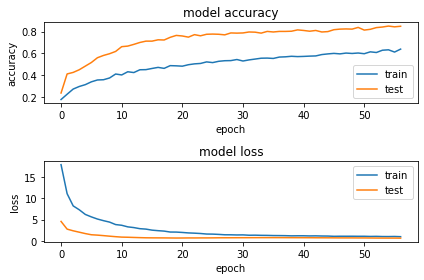

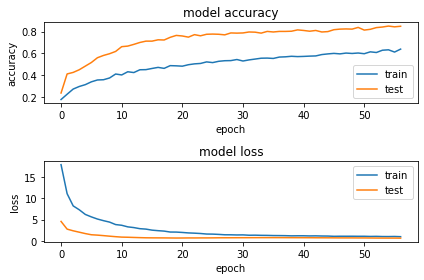

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [ ]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open(data_path+'model_digit_02.json', "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights(data_path+'model_digit_02.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
#loading the model
json_file = open(data_path+'model_digit.json_01', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights(data_path+'model_digit_01.h5')
#compiling the model
loaded_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adadelta(),metrics=['accuracy'])

# Working with new data and predictions

In [ ]:
mat = spio.loadmat(data_path + 'submission.mat', squeeze_me=True)
submission = mat['d']

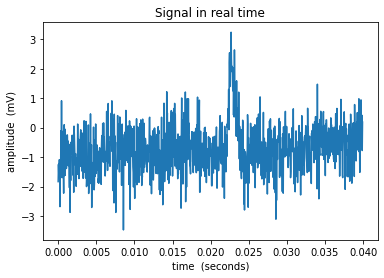

In [ ]:
plt.title('Signal in real time')
plt.xlabel('time  (seconds)')
plt.ylabel('amplitude  (mV)')
plt.plot(np.array(range(submission[480000:480999].size))/25000, submission[480000:480999])
plt.show()

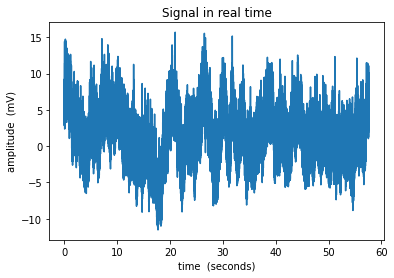

In [ ]:
plt.title('Signal in real time')
plt.xlabel('time  (seconds)')
plt.ylabel('amplitude  (mV)')
plt.plot(np.array(range(submission.size))/25000, submission)
plt.show()

Feeding data to the neral network

In [ ]:
submission_frames=[]
l=submission.size
s=0
while s<l-57:
  submission_frames.append(submission[s:s+57]) #slicing a window for our future spectrogram
  s+=47

submission_frames.append(submission[l-57:])
submission_frames=np.array(submission_frames)
print(submission_frames.shape)


(30639, 57)


In [ ]:
window=47
hop=1
submission_spectr=[]
for h in submission_frames:
    spec=spec_to_image(get_spectrogram(h,0,window,hop))
    submission_spectr.append(spec)
submission_spectr=np.array(submission_spectr)
row=24
column=57

In [ ]:
submission_spectr = submission_spectr.reshape(submission_spectr.shape[0], row, column, 1)

In [ ]:
results=np.array(model.predict(submission_spectr))

In [ ]:
results_=[]
for r in results:
  results_.append(np.argmax(r))
print(results_)

[3, 4, 4, 3, 0, 4, 4, 0, 0, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 0, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

Everything is bad with real data

In [ ]:
predicted_index=[]
predicted_keys=[]
for p in submission_frames:
  predicted_index.append(p[0])
x=0

for w in predicted_index:
  predicted_keys.append((predicted_index,results_[x]))
  x+=1


In [ ]:
print(predicted_keys[4])